# Name - Kshitija  Barge

Aim:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Loading Data

In [2]:
d=datasets.load_iris()

In [3]:
d=pd.DataFrame(d.data,columns=d.feature_names)
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Preprocessing

In [4]:

d.shape

(150, 4)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
d.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#To check the missing values if any
d.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

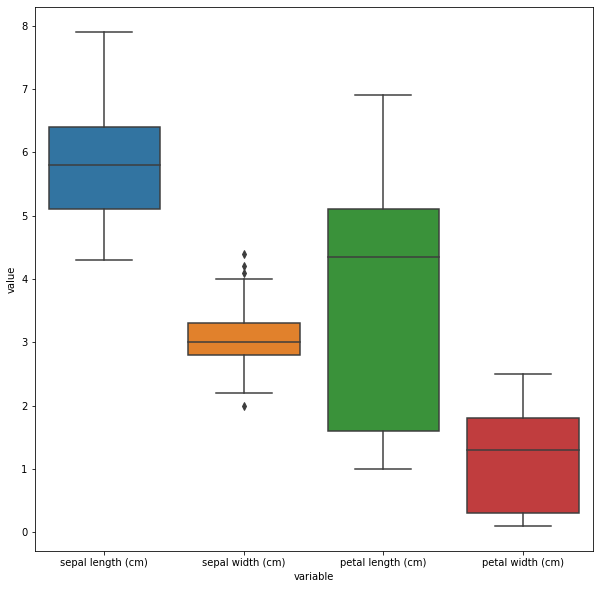

In [8]:
#To check the outliers
d1=d.iloc[:,range(0,4)]
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(x="variable", y="value", data=pd.melt(d1))

### Optimum Number of Clusters for KMeans is Calculated as:

In [9]:
a= d.iloc[: ,[0,1,2,3]].values
a

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

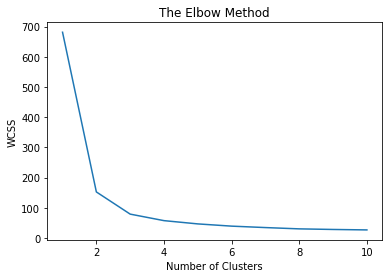

In [10]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kMeans = KMeans(n_clusters = i , init ='k-means++', random_state =0)
    kMeans.fit(a)
    wcss.append(kMeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can see that Elbow has occured at n=3. Hence, Optimum number of Cluster equals 3.
This is point Where, Within Cluster Sum of Square (WCSS) doesnt decrease Significantly.

# Fitting Of Model

In [11]:
 
from sklearn.cluster import KMeans
Kmeans= KMeans(n_clusters =3,init ='k-means++' , random_state =0)
y = Kmeans.fit_predict(a)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


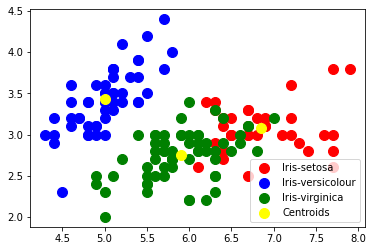

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(a[y == 0, 0], a[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(a[y == 1, 0], a[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(a[y == 2, 0], a[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

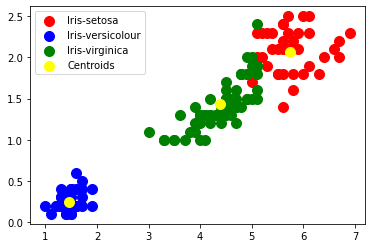

In [15]:
#Visualising the clusters - On the Last two columns

plt.scatter(a[y == 0, 2], a[y == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(a[y == 1, 2], a[y == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(a[y == 2, 2], a[y == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 2], Kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()